<a href="https://colab.research.google.com/github/22104071/GS_071/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd

In [88]:
import matplotlib.pyplot as plt

In [89]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [354]:
titanic_data = fetch_openml('titanic',version=1,as_frame=True)


In [355]:
df = titanic_data.data
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [356]:
df['survived'] = titanic_data['target']
df.loc[df['age']>0]
df.loc[df['age']==0]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived


<Axes: xlabel='survived', ylabel='count'>

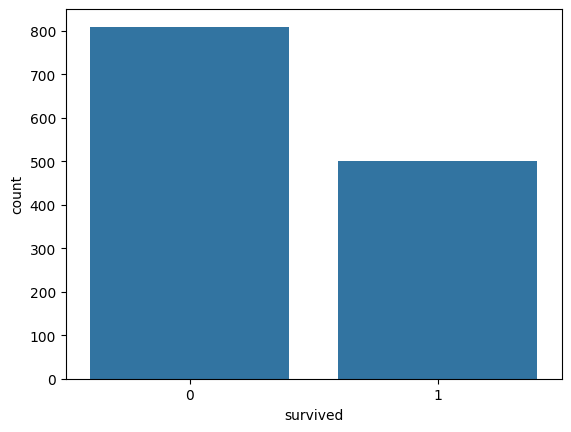

In [357]:
sns.countplot(x='survived',data=df)

<Axes: xlabel='survived', ylabel='count'>

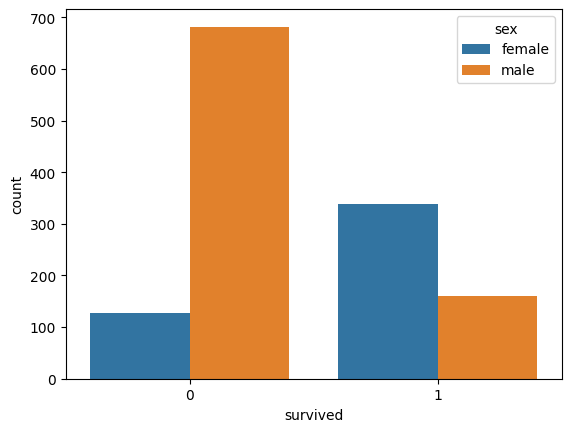

In [358]:
df['survived'] = titanic_data['target']
sns.countplot(x='survived',data=df,hue='sex')

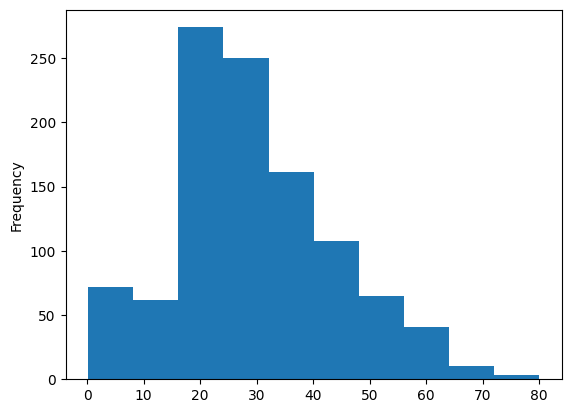

In [359]:
a = df['age'].plot.hist()

a.xlabel='age'

In [363]:
df['family']=df['parch']+df['sibsp']

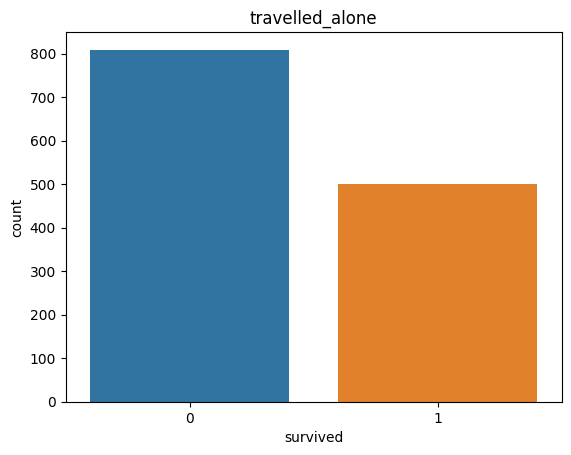

In [366]:
df.loc[df['family']>0]#0
df.loc[df['family']==0]#1
sns.countplot(x='survived',data=df,hue='survived')
plt.title('travelled_alone')
plt.show()

In [367]:
df['family'].head()

0    0.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: family, dtype: float64

In [369]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",1,0.0
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3.0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,3.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0,3.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,3.0


In [370]:
sex=pd.get_dummies(df['sex'],drop_first = True,dtype=int)
df.drop(['sex'],axis=1,inplace=True)
df = pd.concat([df,sex],axis=1)
sex

,male
0,0
1,1
2,0
3,1
4,0
...,...
1304,0
1305,0
1306,1
1307,1


In [371]:
df.isnull().sum()

pclass          0
name            0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
family          0
male            0
dtype: int64

In [373]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
df['age']=imp_mean.fit_transform(df[['age']])
df['fare']=imp_mean.fit_transform(df[['fare']])
df.head()

,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,male
0,1.0,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",1,0.0,0
1,1.0,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3.0,1
2,1.0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,3.0,0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0,3.0,1
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,3.0,0


In [374]:

df.isnull().sum()

pclass          0
name            0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
family          0
male            0
dtype: int64

In [375]:
if 'embarked' in df.columns:
  embarked = pd.get_dummies(df['embarked'],drop_first=True)
  embarked
  print(embarked)
  df.drop(['embarked'],axis=1,inplace=True)
  df = pd.concat([df,embarked],axis=1)
  df.head()

          Q      S
0     False   True
1     False   True
2     False   True
3     False   True
4     False   True
...     ...    ...
1304  False  False
1305  False  False
1306  False  False
1307  False  False
1308  False   True

[1309 rows x 2 columns]


In [380]:
df.isnull().sum()

pclass      0
age         0
sibsp       0
parch       0
fare        0
survived    0
family      0
male        0
Q           0
S           0
dtype: int64

In [381]:


x= df.drop(['survived'],axis=1)
y= df['survived']
df.head()

,pclass,age,sibsp,parch,fare,survived,family,male,Q,S
0,1.0,29.0000,0.0,0.0,211.3375,1,0.0,0,False,True
1,1.0,0.9167,1.0,2.0,151.5500,1,3.0,1,False,True
2,1.0,2.0000,1.0,2.0,151.5500,0,3.0,0,False,True
3,1.0,30.0000,1.0,2.0,151.5500,0,3.0,1,False,True
4,1.0,25.0000,1.0,2.0,151.5500,0,3.0,0,False,True


In [382]:
x.head(),x.shape

(   pclass      age  sibsp  parch      fare  family  male      Q     S
 0     1.0  29.0000    0.0    0.0  211.3375     0.0     0  False  True
 1     1.0   0.9167    1.0    2.0  151.5500     3.0     1  False  True
 2     1.0   2.0000    1.0    2.0  151.5500     3.0     0  False  True
 3     1.0  30.0000    1.0    2.0  151.5500     3.0     1  False  True
 4     1.0  25.0000    1.0    2.0  151.5500     3.0     0  False  True,
 (1309, 9))

In [383]:
y.head(),y.shape

(0    1
 1    1
 2    0
 3    0
 4    0
 Name: survived, dtype: category
 Categories (2, object): ['0', '1'],
 (1309,))

In [384]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)





In [385]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((916, 9), (393, 9), (916,), (393,))

In [386]:
from sklearn.linear_model import LogisticRegression

In [392]:
mod = LogisticRegression()
mod.fit(x_train,y_train)
pred= mod.predict(x_test)
pred

from sklearn import metrics
metrics.accuracy_score(y_test,pred)

0.7964376590330788

0.7964376590330788